<a href="https://colab.research.google.com/github/Psychraft/Big-Data-Project/blob/main/Final_Project_Big_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Victor Oscar Bernal Alpizar
Student ID 4156
  
Final Project Big Data Analysis

                                      Professor: Piotr Radkowski 


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  print('User uploaded file "{name}" with length {length} bytes'.format(

name=fn, length=len(uploaded[fn])))

Saving cardio_train.csv to cardio_train.csv
User uploaded file "cardio_train.csv" with length 2941524 bytes


In [14]:
import pandas as pd #Data processing
import numpy as np
from scipy import stats

# Data visualization  
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import os # accessing directory structure
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra



In [ ]:
#To read the dataset that was uploaded in colab 
Cardio_disease = pd.read_csv (r'/content/cardio_train.csv')

In [ ]:
Cardio_disease


,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0
...,...
69995,99993;19240;2;168;76.0;120;80;1;1;1;0;1;0
69996,99995;22601;1;158;126.0;140;90;2;2;0;0;1;1
69997,99996;19066;2;183;105.0;180;90;3;1;0;1;0;1
69998,99998;22431;1;163;72.0;135;80;1;2;0;0;0;1


First step to be done is the inspection of the files and to check if the data was neither corrupted nor damaged which I made sure this wont happen. Also considering the semicolon as the separator so that all observations can be readeable.

In [8]:
#Dataset needs to be delimited with semicolon
Cardio_disease2 = pd.read_csv (r'/content/cardio_train.csv', delimiter=';')


In [ ]:
print(Cardio_disease2)

          id    age  gender  height  weight  ...  gluc  smoke  alco  active  cardio
0          0  18393       2     168    62.0  ...     1      0     0       1       0
1          1  20228       1     156    85.0  ...     1      0     0       1       1
2          2  18857       1     165    64.0  ...     1      0     0       0       1
3          3  17623       2     169    82.0  ...     1      0     0       1       1
4          4  17474       1     156    56.0  ...     1      0     0       0       0
...      ...    ...     ...     ...     ...  ...   ...    ...   ...     ...     ...
69995  99993  19240       2     168    76.0  ...     1      1     0       1       0
69996  99995  22601       1     158   126.0  ...     2      0     0       1       1
69997  99996  19066       2     183   105.0  ...     1      0     1       0       1
69998  99998  22431       1     163    72.0  ...     2      0     0       0       1
69999  99999  20540       1     170    72.0  ...     1      0     0       1 

Cardiovascular Disease Dataset was used for this final project.
This dataset is composed by 13 variables 


#Data description
There are 3 types of input features:

Objective: factual information / this input is easy to measure because either you are male or female or you have age or not.

Examination: results of medical examination / Tells us something that was measured in a process.

Subjective: information given by the patient  /  All the data was collected in reports of patients.



Variables are separated as follows:


VARIABLE | INPUT FEATURES | NAME OF THE VARIABLE IN THE DATASET |  DATA TYPE | (UNIT OF MEASURE ONLY FOR AGE, HEIGHT AND WEIGHT) |  TYPE OF VARIABLE


1. Patient ID | Subjective Feature | ID | int | Quantitative and discrete variable

2. Age | Objective Feature | age | int | (days) | Quantitative and continuous variable

3. Gender | Objective Feature | gender | categorical code | Dummy variable

4. Height | Objective Feature | height | int | (cm) | Quantitative and continuous variable

5. Weight | Objective Feature | weight | float | (kg) | Quantitative and continuous variable

6. Systolic blood pressure | Examination Feature | ap_hi | int | Quantitative and continuous variable

7. Diastolic blood pressure | Examination Feature | ap_lo | int | Quantitative and continuous variable

8. Cholesterol | Examination Feature |  1: normal, 2: above normal, 3: well above normal | Categorical variable

9. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal | Categorical variable

10. Smoking | Subjective Feature | smoke | binary | Dummy variable

11. Alcohol intake | Subjective Feature | alco | binary | Dummy variable

12. Physical activity | Subjective Feature | active | binary | Dummy variable

13. Presence or absence of cardiovascular disease | Target Variable | cardio | binary | Dummy variable

All of the dataset values were collected at the moment of medical examination.

It is important to highlight that for the dummy variables (smoke, alco, active and cardio -> 0 stands for 'NO' and 1 stands for 'YES'. Talking about the categorical variables ( cholesterol and gluc we only have 3 levels defined as follows: 1 -> normal, 2 -> above normal, 3 -> well above normal.

# New Section

In [ ]:
Cardio_disease2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
Cardio_disease2.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:
Cardio_disease2.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
Cardio_disease2.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


Looking at the data we can observed some descriptive statistics mean, max, min and dispertion of every single variable. But it is noticeable that some data must be transformed, such as age variable. Because it is expressed in days and  we need to standardize the data therefore it needs to be converted into years. Variables such as ID won't be taken into account. Considering the min and max values we can notice that outliers need to be removed for example: in the case of height there cannot be a person that is only 55 cm tall or the other way around 250 cm tall not even the tallest man in the world is that tall. For Weight some outliers as well do not have to be considered there cant be a person whose weight is 10 kg or even 200 kg. In the following picture we can see the ranges of the Systolic and Diastolic blood pressure. A normal value for Systolic is less than 120 and for Diastolic is 80 therefore negative values cannot be possible besides max values are even 16020 and 11000 accordingly therefore it is evident that some observations known as outliers need to be removed. 

# Cholesterol ranges can be found on below image


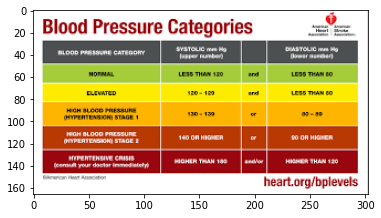

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread('image1.png')
plt.imshow(img)

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  print('User uploaded file "{name}" with length {length} bytes'.format(

name=fn, length=len(uploaded[fn])))

Saving image1.png to image1.png
User uploaded file "image1.png" with length 8938 bytes


In [10]:
# Letw take a look about our data and how it looks like the first 4 rows
Cardio_disease2.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [66]:
Cardio_disease2.dtypes.value_counts()

int64      12
float64     1
dtype: int64

In [41]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

REVISAR AQUI ARRIBA

In [56]:
#Part about checking the quality fo the data is to know if there are some NOT APPLICABLE values but this dataset has no such observations. Lets create a table where with missing data
miss_values=Cardio_disease2.isnull().sum() # missing values

Perc_values_missing = Cardio_disease2.isnull().sum()/Cardio_disease2.shape[0]*100 # missing value %

value = {
    'miss_values':miss_values,
    'Perc_values_missing':Perc_values_missing 
}
frame=pd.DataFrame(value)
frame

,miss_values,Perc_values_missing
id,0,0.0
age,0,0.0
gender,0,0.0
height,0,0.0
weight,0,0.0
ap_hi,0,0.0
ap_lo,0,0.0
cholesterol,0,0.0
gluc,0,0.0
smoke,0,0.0


In [74]:
Cardio_disease2[["gender","cholesterol","gluc","smoke","alco","active","cardio" ]].apply(lambda x: x.value_counts()).T.stack()

gender       1    45530.0
             2    24470.0
cholesterol  1    52385.0
             2     9549.0
             3     8066.0
gluc         1    59479.0
             2     5190.0
             3     5331.0
smoke        0    63831.0
             1     6169.0
alco         0    66236.0
             1     3764.0
active       0    13739.0
             1    56261.0
cardio       0    35021.0
             1    34979.0
dtype: float64

****************************DATA VISUALIZATION OF THE DATA WITHOUT BEING TRANSFORMED*******************************************************************

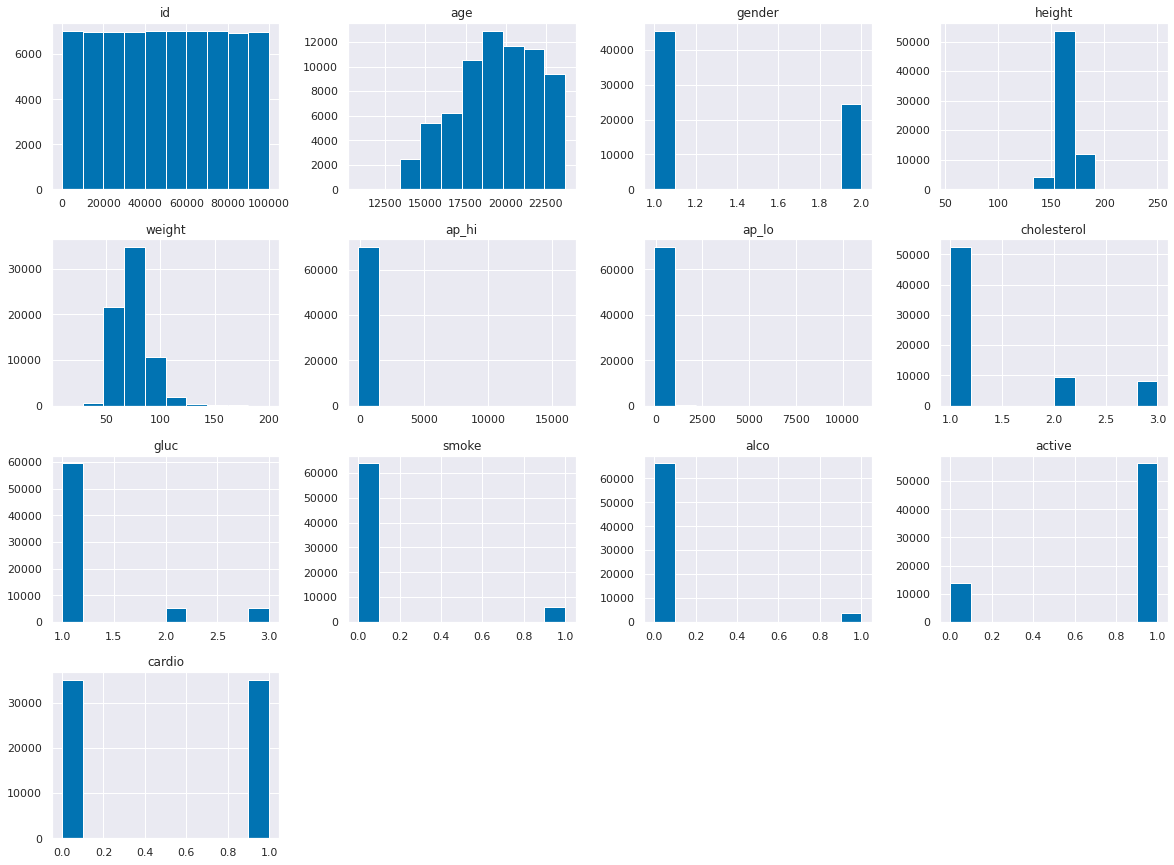

In [68]:
#Let's take a look on the multiple distribution by column
Cardio_disease2.hist(figsize=(20,15));

In [72]:
#CORRELATION MATRIX OF ALL VARIABLES
corr=Cardio_disease2.corr()
corr.style.background_gradient(cmap='Oranges_r',axis=None)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


In [ ]:
main_data.hist(column=['age','weight','height'],bins=25, figsize=(15, 10), color='#FFCF56', edgecolor='black')